In [1]:
# Step 1: Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2: Fetch data from the API
base_url = "https://data.gov.sg/api/action/datastore_search"
url = base_url + "?resource_id=d_a81d5f8d52b89970823dcb17c3e9a77f"

In [3]:
response = requests.get(url)
data = response.json()

In [4]:
# Step 3: Process data
# Convert the records to a DataFrame
records = data['result']['records']
df = pd.DataFrame(records)

In [5]:
# Convert the 'month' column to datetime and 'value' column to numeric
df['month'] = pd.to_datetime(df['month'])
df['value'] = pd.to_numeric(df['value'])

In [6]:
# Step 4: Analyze data
# Basic statistics
print(df.describe())

              _id         value
count  100.000000    100.000000
mean    50.500000  21444.990000
std     29.011492   8439.902227
min      1.000000  10897.000000
25%     25.750000  14919.000000
50%     50.500000  18714.000000
75%     75.250000  27075.250000
max    100.000000  45544.000000


In [7]:
# Group by year and sum the values
df['year'] = df['month'].dt.year
annual_data = df.groupby('year')['value'].sum().reset_index()

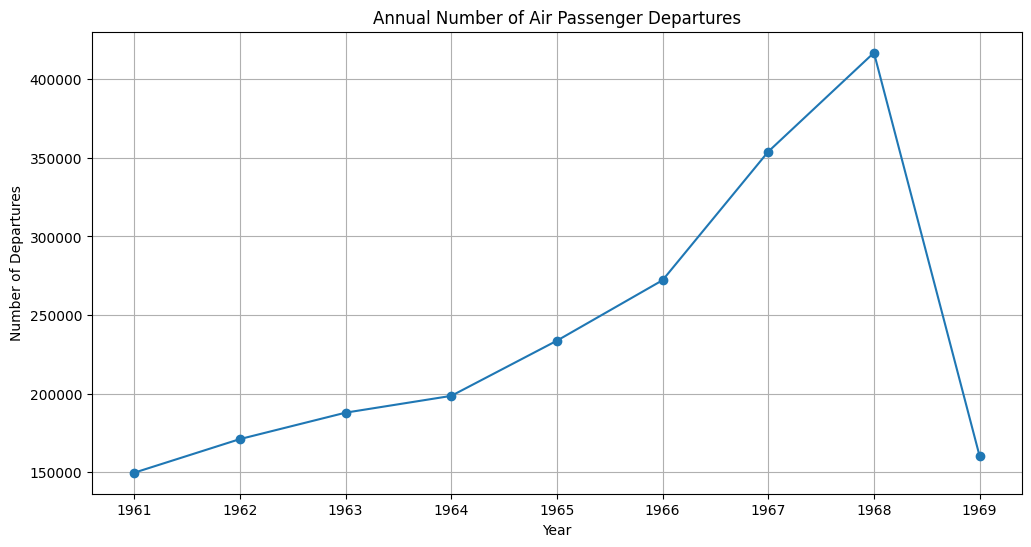

In [8]:
# Step 5: Visualize data
# Plotting the annual number of air passenger departures
plt.figure(figsize=(12, 6))
plt.plot(annual_data['year'], annual_data['value'], marker='o')
plt.title('Annual Number of Air Passenger Departures')
plt.xlabel('Year')
plt.ylabel('Number of Departures')
plt.grid(True)
plt.show()